In [12]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import datetime
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn import linear_model as lm
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt

                Id  MSSubClass    MSZoning  LotFrontage       LotArea  \
count   730.000000  730.000000  730.000000   730.000000    730.000000   
mean   1095.500000   56.547945    3.020548    57.169863  10092.143836   
std     210.877136   41.198619    0.600288    36.361524   5530.730034   
min     731.000000   20.000000    0.000000     0.000000   1300.000000   
25%     913.250000   20.000000    3.000000    40.000000   7599.250000   
50%    1095.500000   50.000000    3.000000    61.000000   9484.500000   
75%    1277.750000   70.000000    3.000000    78.000000  11509.000000   
max    1460.000000  190.000000    4.000000   313.000000  63887.000000   

           Street       Alley    LotShape  LandContour   Utilities  \
count  730.000000  730.000000  730.000000   730.000000  730.000000   
mean     0.995890   -0.913699    1.964384     2.780822    0.001370   
std      0.064018    0.365830    1.405005     0.705584    0.037012   
min      0.000000   -1.000000    0.000000     0.000000    0.00

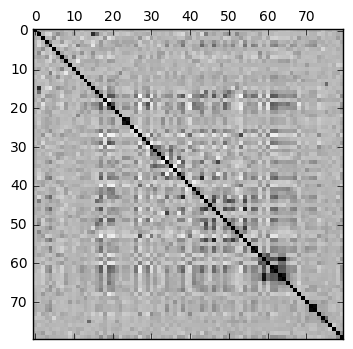

In [24]:
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques

original_train_data = pd.read_csv('data/train.csv',delimiter=',',header=0)
original_test_data = pd.read_csv('data/test.csv',delimiter=',',header=0)

# train data; convert categoricals to integers
obj_columns = original_train_data.select_dtypes(['object']).columns
original_train_data[obj_columns] = original_train_data[obj_columns].apply(lambda x: x.astype('category').cat.codes)
original_train_data = original_train_data.fillna(value=0)

# test data; convert categoricals to integers
obj_columns = original_test_data.select_dtypes(['object']).columns
original_test_data[obj_columns] = original_test_data[obj_columns].apply(lambda x: x.astype('category').cat.codes)
original_test_data = original_test_data.fillna(value=0)

testdev_split = (len(original_train_data))/2

train_data = original_train_data.copy()[testdev_split:]
train_labels = train_data["SalePrice"].copy()
train_data = train_data.drop( ["SalePrice"], axis=1 )

dev_data = original_train_data.copy()[:testdev_split]
dev_labels = dev_data["SalePrice"].copy()
dev_data = dev_data.drop( ["SalePrice"], axis=1 )

test_data = original_test_data.copy()

# check data quality
print train_data.describe()

# check for correlation between features
corr = train_data.corr()
plt.matshow(corr, cmap=plt.cm.Greys)

#IDEAS

: Dlb-check category conversion...NaN = 0 after, but before?; address?
: Check distributions; adjust skew if necessary
: Normalization/scaling


In [35]:
reg = LinearRegression()
reg.fit(train_data, train_labels)
print "Coefficients: " + str(reg.coef_)
print('R^2: %1.2f' % reg.score(dev_data, dev_labels))

# various score measures
pred_labels = reg.predict(dev_data)

# r2_score should be the same as reg.score
print metrics.r2_score(dev_labels,pred_labels, multioutput='uniform_average')
print metrics.explained_variance_score(dev_labels,pred_labels, multioutput='uniform_average')

Coefficients: [ -6.89587912e+00  -5.99661013e+01  -2.41192392e+03  -4.23986755e+01
   6.77061818e-01   5.57370104e+04  -2.08138387e+02  -8.85413134e+02
   2.79019372e+03  -5.61971662e+04   8.68934032e+02   5.30221730e+03
   1.45333531e+02  -7.80246717e+02  -3.94473526e+02  -2.29138233e+03
  -3.13660938e+02   8.59990554e+03   6.49627908e+03   2.06301301e+02
  -7.70077526e+01   3.16546314e+03   1.54903739e+03  -1.79375672e+03
   1.07009605e+03   5.06887623e+03   4.75995224e+01  -1.17688078e+04
   1.40819190e+02   9.00908618e+02  -9.80774865e+03   1.53767100e+03
  -3.26586565e+03  -4.50351249e+00   4.69332189e+00   4.37033705e+03
   1.29789854e+01  -9.66484735e-01   1.67058226e+01  -3.25926025e+03
  -2.25725808e+02   1.88022852e+03  -3.63269094e+02   1.91675787e+01
   2.58934720e+01  -3.01539700e+01   1.49070803e+01   8.37170054e+03
   8.01412362e+00   5.29951182e+03   7.60630357e+02  -2.86512498e+03
  -2.23342755e+04  -7.49337597e+03   3.61198147e+03   3.26305904e+03
   6.77143817e+03  -